### 1. Linear Regression with the Iris Dataset

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. In this example, we'll perform linear regression using the well-known Iris dataset to predict the sepal width based on the sepal length.

#### Introduction

Linear regression aims to find the best-fitting line that minimizes the sum of squared differences between the predicted and actual values. The coefficients of the line represent the slope and intercept in the case of simple linear regression.

#### Example Code

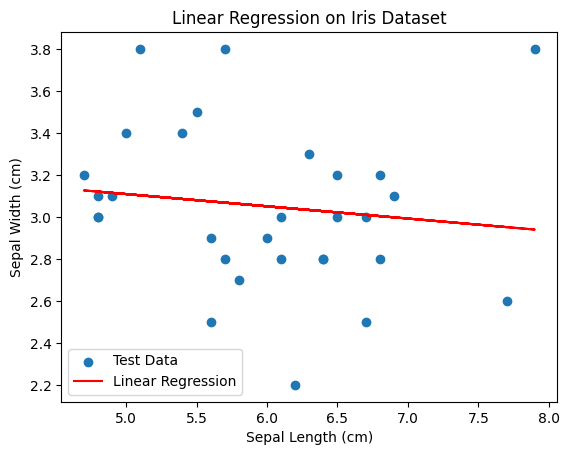

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# For simplicity, use only one feature (sepal length) as the independent variable
X = data['sepal length (cm)'].values.reshape(-1, 1)

# The dependent variable is sepal width
y = data['sepal width (cm)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the original data and the linear regression line
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_pred, 'r-', label='Linear Regression')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Linear Regression on Iris Dataset')
plt.legend()
plt.show()

### 2. Logistic Regression with the Iris Dataset

Logistic regression is a classification algorithm that models the probability of a binary outcome. In this example, we'll use logistic regression to perform binary classification on the Iris dataset, predicting whether a flower belongs to a specific class or not.

#### Introduction

Logistic regression is suitable for binary classification problems, where the dependent variable has two classes. It models the probability that an instance belongs to a particular class.

#### Example Code


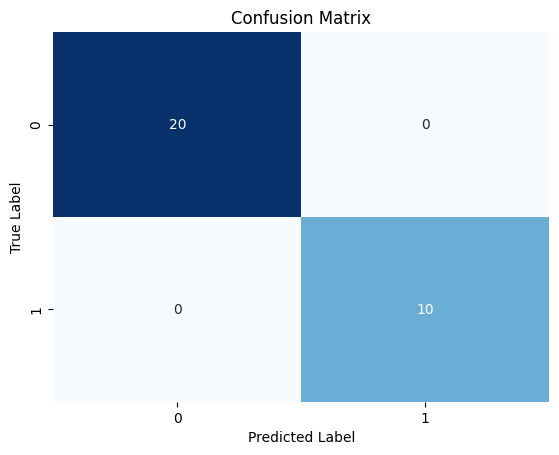

Accuracy: 100.00%


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# For simplicity, use only two classes (setosa and non-setosa)
data['target'] = (data['target'] == 0).astype(int)

# Define features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

### 3. Polynomial Regression

Polynomial regression is a type of regression algorithm that models the relationship between the independent variable and the dependent variable as an nth-degree polynomial. It allows us to capture more complex relationships in the data compared to linear regression.

#### Introduction

In polynomial regression, the relationship between the variables is modeled as a polynomial equation of degree n. The equation takes the form:
\[ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n \]

#### Example Code

Mean Squared Error: 0.46


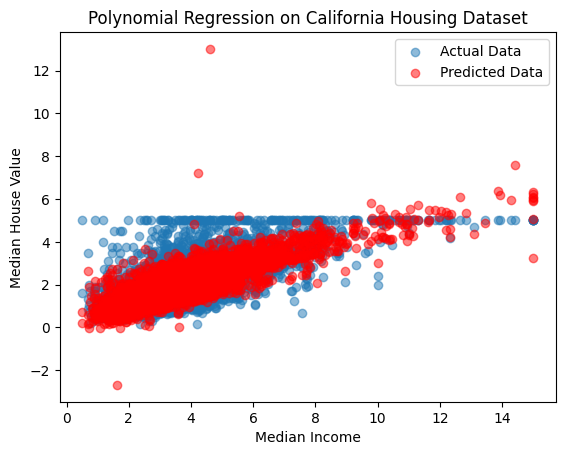

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing.data, california_housing.target],
                    columns=california_housing.feature_names + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add polynomial features of degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a linear regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = poly_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize the results
plt.scatter(X_test['MedInc'], y_test, label='Actual Data', alpha=0.5)
plt.scatter(X_test['MedInc'], y_pred, color='red', label='Predicted Data', alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression on California Housing Dataset')
plt.legend()
plt.show()


### 4. Ridge Regression with the California Housing Dataset

Ridge regression is a regularized linear regression algorithm that includes a regularization term to prevent overfitting. It is particularly useful when dealing with multicollinearity in the dataset.

#### Introduction

In Ridge regression, a penalty term is added to the linear regression cost function, which is proportional to the square of the magnitude of the coefficients. This regularization term helps to prevent the model from becoming too complex and overfitting the training data.

#### Example Code

Mean Squared Error: 0.56


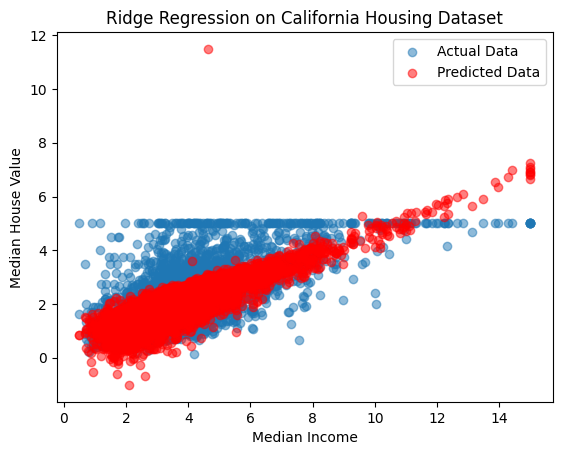

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing.data, california_housing.target],
                    columns=california_housing.feature_names + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize the results
plt.scatter(X_test['MedInc'], y_test, label='Actual Data', alpha=0.5)
plt.scatter(X_test['MedInc'], y_pred, color='red', label='Predicted Data', alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Ridge Regression on California Housing Dataset')
plt.legend()
plt.show()


### 5. Lasso Regression with the California Housing Dataset

Lasso regression is a regularized linear regression algorithm that includes a penalty term to prevent overfitting. It differs from Ridge regression by adding the absolute values of the coefficients as a penalty term, encouraging sparse models.

#### Introduction

In Lasso regression, the penalty term added to the linear regression cost function is proportional to the absolute values of the coefficients. This regularization term helps to prevent the model from becoming too complex and encourages some coefficients to be exactly zero, effectively performing feature selection.

#### Example Code

Mean Squared Error: 1.31


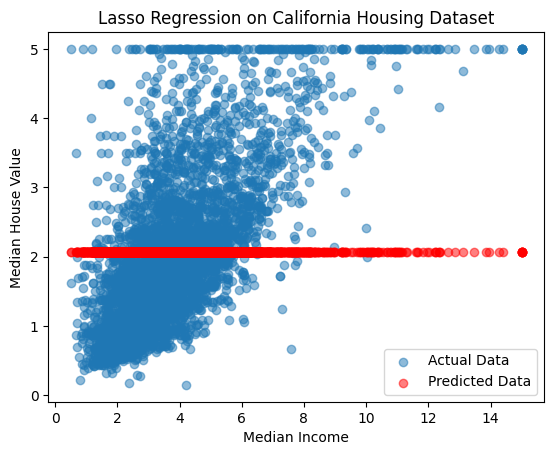

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing.data, california_housing.target],
                    columns=california_housing.feature_names + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso regression model
lasso_reg = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lasso_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize the results
plt.scatter(X_test['MedInc'], y_test, label='Actual Data', alpha=0.5)
plt.scatter(X_test['MedInc'], y_pred, color='red', label='Predicted Data', alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Lasso Regression on California Housing Dataset')
plt.legend()
plt.show()


### 6. Elastic Net Regression with the California Housing Dataset

Elastic Net regression is a linear regression algorithm that combines both L1 (Lasso) and L2 (Ridge) regularization terms. It is effective in handling datasets with a large number of features and addressing multicollinearity.

#### Introduction

In Elastic Net regression, the cost function includes both L1 and L2 regularization terms. This combination allows Elastic Net to overcome some limitations of Lasso regression, such as selecting at most n variables if n features are correlated.

#### Example Code


Mean Squared Error: 1.04


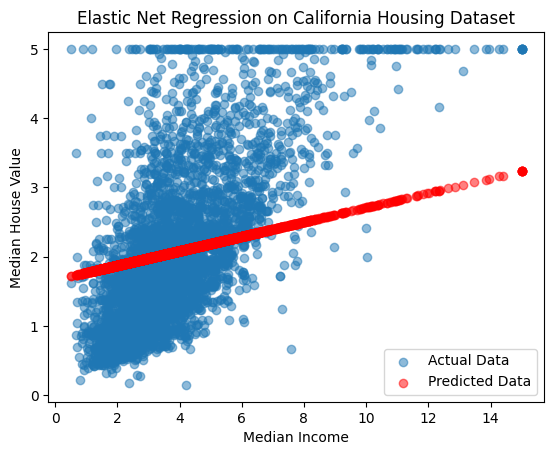

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing.data, california_housing.target],
                    columns=california_housing.feature_names + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an Elastic Net regression model
elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the overall regularization strength, l1_ratio is the ratio of L1 regularization
elastic_net_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = elastic_net_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize the results
plt.scatter(X_test['MedInc'], y_test, label='Actual Data', alpha=0.5)
plt.scatter(X_test['MedInc'], y_pred, color='red', label='Predicted Data', alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Elastic Net Regression on California Housing Dataset')
plt.legend()
plt.show()


### 7. Decision Trees with the Iris Dataset

Decision Trees are versatile machine learning algorithms used for both classification and regression tasks. They make decisions based on features and create a tree-like structure to predict the target variable.

#### Introduction

In Decision Trees, the dataset is recursively split into subsets based on feature conditions. At each split, the algorithm selects the feature that provides the best separation according to a chosen criterion (e.g., Gini impurity, entropy). This process continues until a stopping condition is met.

#### Example Code


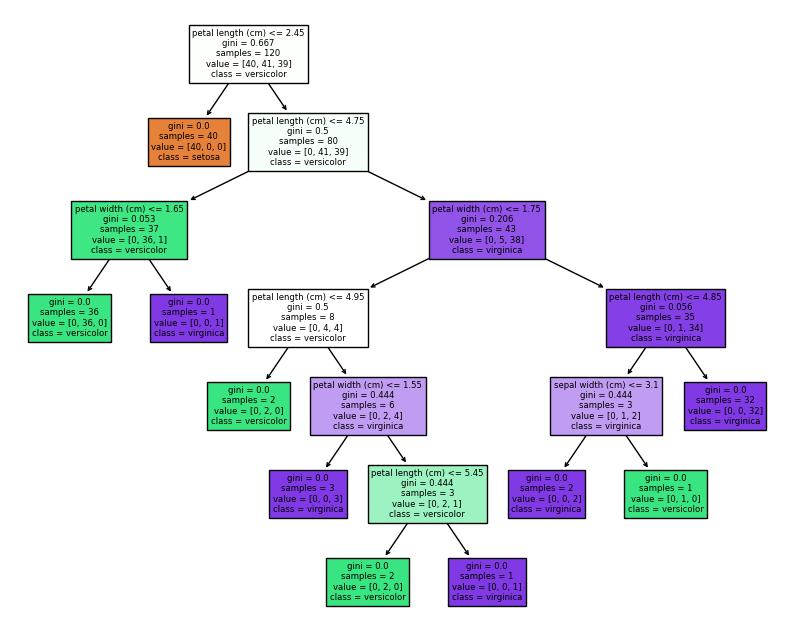

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(tree_classifier, feature_names=iris['feature_names'], class_names=iris['target_names'], filled=True)
plt.show()

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


### 8. Random Forests with the Iris Dataset

Random Forests is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

#### Introduction

In Random Forests, multiple decision trees are trained on different subsets of the data and the features. The final prediction is often a majority vote (classification) or an average (regression) of the predictions made by individual trees.

#### Example Code

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 9. Gradient Boosting Machines with the Iris Dataset

Gradient Boosting Machines (GBM) is an ensemble learning method that builds a series of weak learners and combines their predictions to create a strong predictive model.

#### Introduction

In GBM, weak learners are added sequentially to the model, with each new learner focusing on the mistakes made by the existing ensemble. This iterative process continues until a predefined number of learners or a stopping criterion is reached.

#### Example Code


In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
gbm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 10. Gradient Boosting Machines with the Iris Dataset

Gradient Boosting Machines (GBM) is an ensemble learning method that builds a series of weak learners and combines their predictions to create a strong predictive model.

#### Introduction

In GBM, weak learners are added sequentially to the model, with each new learner focusing on the mistakes made by the existing ensemble. This iterative process continues until a predefined number of learners or a stopping criterion is reached.

#### Example Code

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
gbm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 11. Light Gradient Boosting Machine (LightGBM) with the Iris Dataset

LightGBM is an efficient implementation of the gradient boosting algorithm, designed for distributed and efficient training.

#### Introduction

LightGBM builds a series of weak learners (typically decision trees) and combines their predictions to create a strong predictive model. It is optimized for speed, supports distributed training, and is memory-efficient.

#### Example Code

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
lgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

### 12. CatBoost with the Iris Dataset

CatBoost is a high-performance gradient boosting library designed for categorical feature support and efficient training.

#### Introduction

CatBoost builds a series of weak learners (typically decision trees) and combines their predictions to create a strong predictive model. It automatically handles categorical features, reducing the need for manual preprocessing.

#### Example Code

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42, verbose=0)

# Fit the model to the training data
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 13. K-Nearest Neighbors (KNN) with the Iris Dataset

K-Nearest Neighbors is a simple and effective classification algorithm that classifies a data point based on the majority class of its k nearest neighbors.

#### Introduction

In KNN, the class of a new data point is determined by the majority class among its k nearest neighbors. The distance metric used (e.g., Euclidean distance) defines the "closeness" of neighbors.

#### Example Code



In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 14. Support Vector Machines (SVM) with the Iris Dataset

Support Vector Machines is a powerful machine learning algorithm for classification and regression tasks. It works by finding the hyperplane that best separates the data into different classes while maximizing the margin between them.

#### Introduction

In SVM, the goal is to find the hyperplane that maximizes the margin between different classes. It can handle linear and non-linear separation using different kernel functions.

#### Example Code


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 15. Naive Bayes with the Iris Dataset

Naive Bayes is a probabilistic algorithm based on Bayes' theorem, commonly used for classification tasks.

#### Introduction

Naive Bayes assumes that features are conditionally independent given the class. It is particularly effective for text classification but can be applied to various types of data.

#### Example Code

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier using Gaussian Naive Bayes
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 16. Artificial Neural Network (ANN) with the Iris Dataset

Artificial Neural Networks (ANN) are a class of machine learning models inspired by the structure and function of the human brain.

#### Introduction

ANN consists of layers of interconnected nodes (neurons) that process and transform input data to produce an output. It is widely used for various tasks, including classification and regression.

#### Example Code

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an Artificial Neural Network (ANN) classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', max_iter=1000, random_state=42)

# Fit the model to the training data
ann_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = ann_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 96.67%
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


d:\MusaddiqueHussainLabs\ml_exercise_playground\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### 17. Convolutional Neural Network (CNN) with the CIFAR-10 Dataset

Convolutional Neural Networks (CNNs) are deep neural networks designed for tasks such as image recognition.

#### Introduction

CNNs use convolutional layers to automatically and adaptively learn spatial hierarchies of features from input data. They are particularly effective for image-related tasks.

#### Example Code


170498071/170498071 [==============================] - 384s 2us/step



Epoch 1/10


1250/1250 [==============================] - 12s 9ms/step - loss: 1.6091 - accuracy: 0.4087 - val_loss: 1.3243 - val_accuracy: 0.5275
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2577 - accuracy: 0.5504 - val_loss: 1.1884 - val_accuracy: 0.5822
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0950 - accuracy: 0.6118 - val_loss: 1.0856 - val_accuracy: 0.6128
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9915 - accuracy: 0.6511 - val_loss: 1.0219 - val_accuracy: 0.6354
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9076 - accuracy: 0.6793 - val_loss: 1.0431 - val_accuracy: 0.6372
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8501 - accuracy: 0.7010 - val_loss: 0.9168 - val_accuracy: 0.6859
Epoch 7/10
1250/1250 [==============================] - 

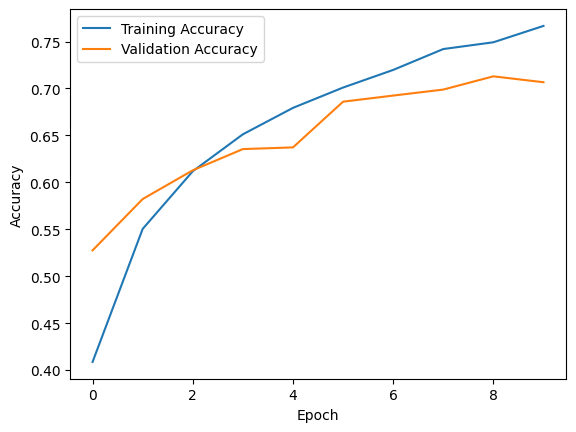

In [28]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create a Convolutional Neural Network (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 18. Recurrent Neural Network (RNN) with the IMDB Dataset

Recurrent Neural Networks (RNNs) are designed for sequential data, where the order of elements matters.

#### Introduction

RNNs have connections that form directed cycles, allowing them to maintain a hidden state that captures information about previous inputs. They are suitable for tasks such as sequence classification.

#### Example Code

17464789/17464789 [==============================] - 3s 0us/step
Epoch 1/5
157/157 [==============================] - 13s 73ms/step - loss: 0.6819 - accuracy: 0.5586 - val_loss: 0.6572 - val_accuracy: 0.6172
Epoch 2/5
157/157 [==============================] - 12s 73ms/step - loss: 0.4966 - accuracy: 0.7620 - val_loss: 0.4607 - val_accuracy: 0.7878
Epoch 3/5
157/157 [==============================] - 12s 75ms/step - loss: 0.2966 - accuracy: 0.8824 - val_loss: 0.4013 - val_accuracy: 0.8308
Epoch 4/5
157/157 [==============================] - 12s 74ms/step - loss: 0.1917 - accuracy: 0.9315 - val_loss: 0.4205 - val_accuracy: 0.8280
Epoch 5/5
782/782 [==============================] - 11s 15ms/step - loss: 0.4600 - accuracy: 0.8336
Test Accuracy: 83.36%


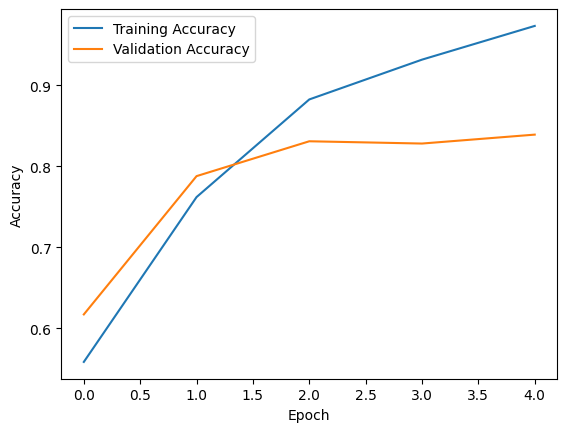

In [29]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000  # Consider the top 10,000 most frequent words
maxlen = 500  # Limit each review to 500 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have consistent length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create a Recurrent Neural Network (RNN)
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 19. Long Short-Term Memory (LSTM) with the IMDB Dataset

Long Short-Term Memory (LSTM) networks are designed to handle long-term dependencies in sequential data.

#### Introduction

LSTMs are a type of recurrent neural network (RNN) that overcomes the vanishing gradient problem associated with traditional RNNs. They are particularly effective for tasks involving sequential data.

#### Example Code


Epoch 1/5
157/157 [==============================] - 32s 193ms/step - loss: 0.5131 - accuracy: 0.7493 - val_loss: 0.3668 - val_accuracy: 0.8432
Epoch 2/5
157/157 [==============================] - 28s 180ms/step - loss: 0.2815 - accuracy: 0.8927 - val_loss: 0.3232 - val_accuracy: 0.8746
Epoch 3/5
157/157 [==============================] - 29s 182ms/step - loss: 0.2128 - accuracy: 0.9219 - val_loss: 0.3228 - val_accuracy: 0.8836
Epoch 4/5
157/157 [==============================] - 28s 180ms/step - loss: 0.1552 - accuracy: 0.9465 - val_loss: 0.3028 - val_accuracy: 0.8738
Epoch 5/5
782/782 [==============================] - 20s 26ms/step - loss: 0.3493 - accuracy: 0.8672
Test Accuracy: 86.72%


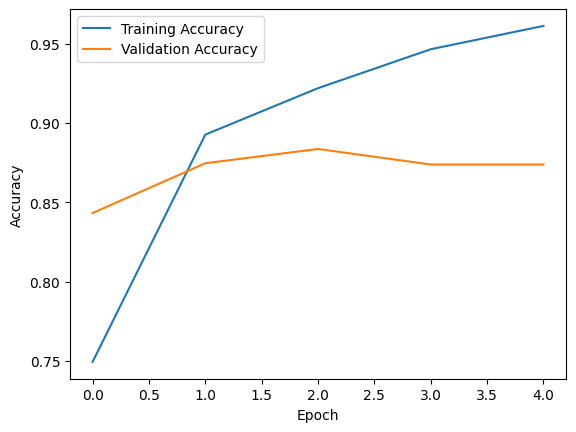

In [30]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000  # Consider the top 10,000 most frequent words
maxlen = 500  # Limit each review to 500 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have consistent length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create an LSTM network
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 20. Autoencoder with the MNIST Dataset

Autoencoders are neural networks designed for unsupervised learning, particularly for feature learning and data compression.

#### Introduction

Autoencoders consist of an encoder and a decoder, where the encoder compresses the input data into a lower-dimensional representation, and the decoder reconstructs the original data from this representation.

#### Example Code


Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2780 - val_loss: 0.1906
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1702 - val_loss: 0.1527
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1435 - val_loss: 0.1329
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1280 - val_loss: 0.1211
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1183 - val_loss: 0.1130
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1114 - val_loss: 0.1072
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1063 - val_loss: 0.1030
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1027 - val_loss: 0.0998
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0999 - val_loss: 0.0974
Epoch 10/10
313/313 [==============================] - 1s 1ms/step


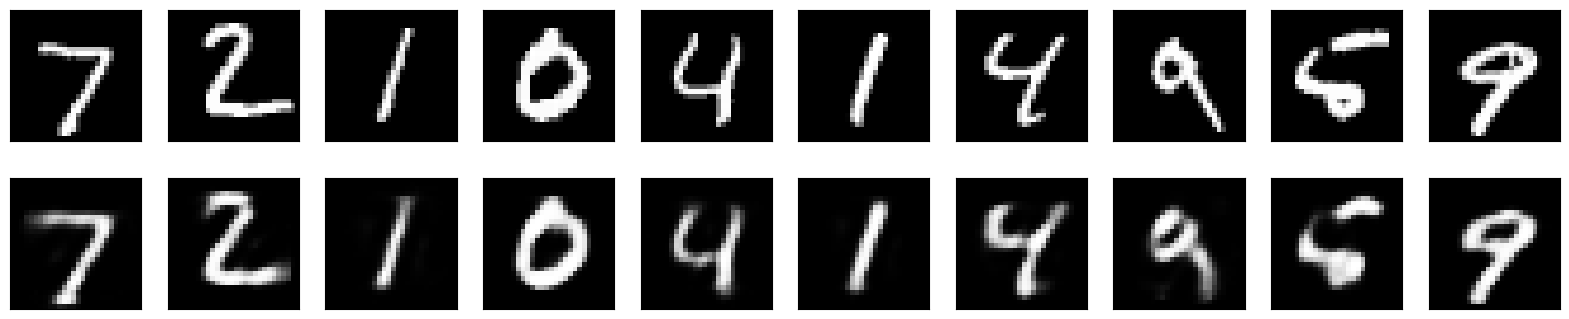

In [31]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on the MNIST data
autoencoder.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_flat, x_test_flat))

# Encode and decode the test set to see the reconstructed images
decoded_imgs = autoencoder.predict(x_test_flat)

# Plot some original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


### 21. Generative Adversarial Network (GAN) with the MNIST Dataset

Generative Adversarial Networks (GANs) consist of a generator and a discriminator trained simultaneously through adversarial training.

#### Introduction

The generator generates fake data, and the discriminator tries to distinguish between real and fake data. Over time, the generator improves its ability to generate realistic data, while the discriminator becomes more adept at distinguishing real from fake data.

#### Example Code

1/1 [==============================] - 0s 118ms/step
0/100 [D loss: 0.8905893564224243 | D accuracy: 10.9375] [G loss: 0.5522851347923279]
1/1 [==============================] - 0s 24ms/step
1/100 [D loss: 0.3706478327512741 | D accuracy: 70.3125] [G loss: 0.5894843339920044]
1/1 [==============================] - 0s 23ms/step
2/100 [D loss: 0.34606387466192245 | D accuracy: 79.6875] [G loss: 0.705910325050354]
1/1 [==============================] - 0s 33ms/step
3/100 [D loss: 0.32683369889855385 | D accuracy: 89.0625] [G loss: 0.9002471566200256]
1/1 [==============================] - 0s 16ms/step
4/100 [D loss: 0.30258067045360804 | D accuracy: 85.9375] [G loss: 1.1483476161956787]
1/1 [==============================] - 0s 29ms/step
5/100 [D loss: 0.23959039151668549 | D accuracy: 100.0] [G loss: 1.5541102886199951]
1/1 [==============================] - 0s 16ms/step
6/100 [D loss: 0.16004862124100327 | D accuracy: 100.0] [G loss: 1.8991681337356567]
1/1 [============================

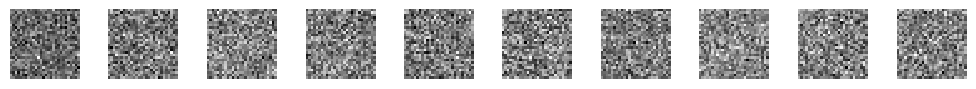

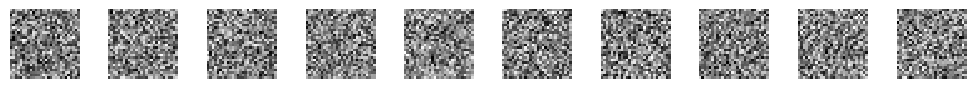

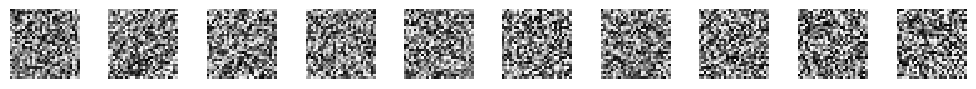

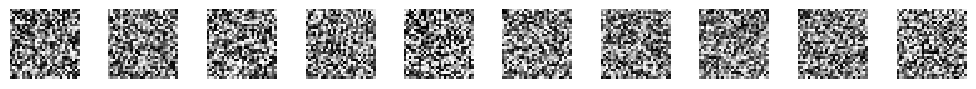

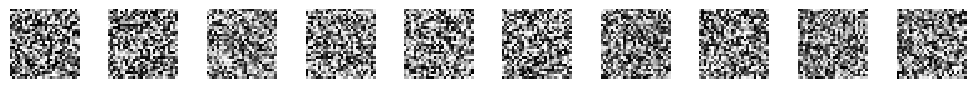

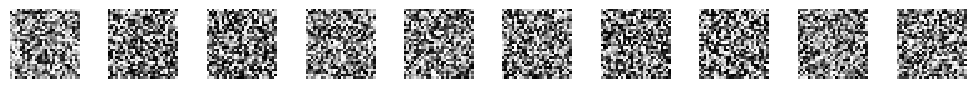

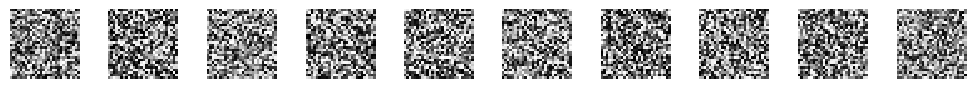

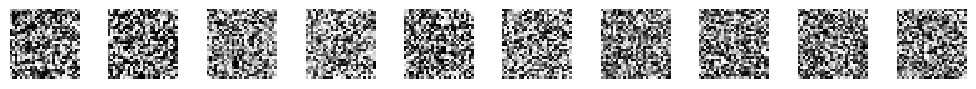

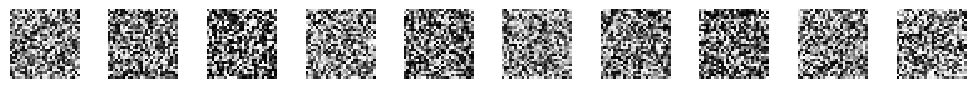

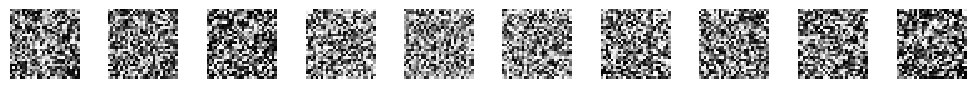

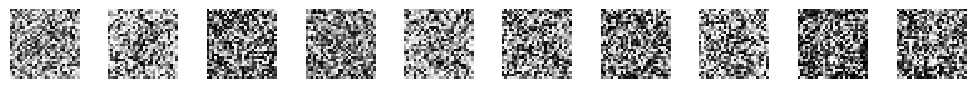

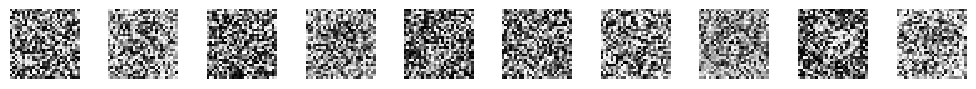

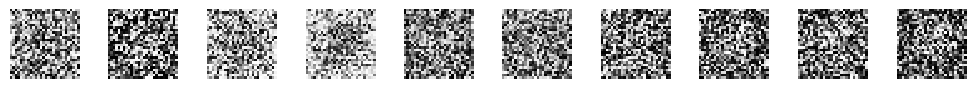

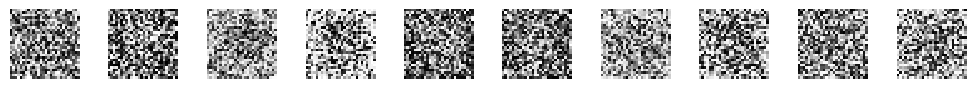

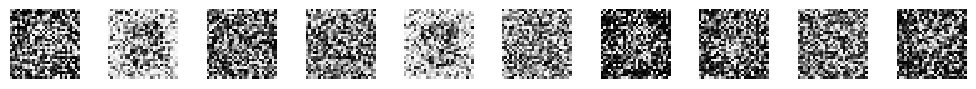

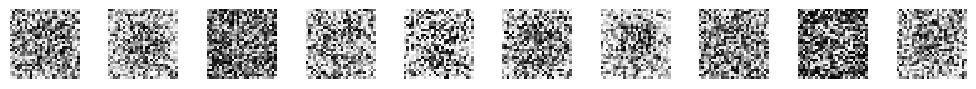

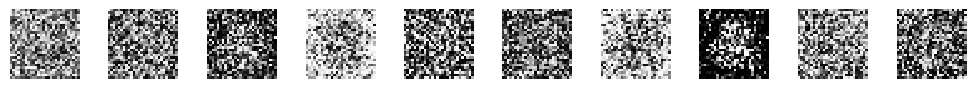

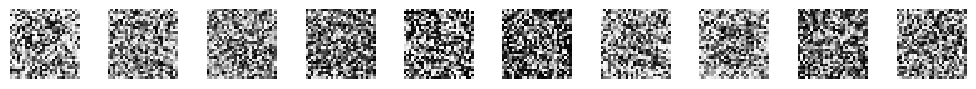

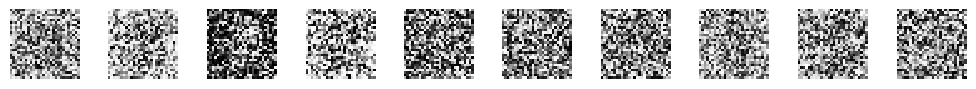

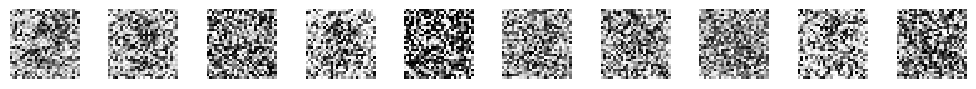

In [34]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Normalize pixel values to be between -1 and 1
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=-1)

# Define the generator model
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build and compile the discriminator
img_shape = (28, 28, 1)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the generator
latent_dim = 100
generator = build_generator(latent_dim)

# Build and compile the combined model (generator and discriminator)
discriminator.trainable = False
z = Input(shape=(latent_dim,))
img = generator(z)
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
def train_gan(epochs=15, batch_size=128, save_interval=1):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        imgs = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))

        g_loss = combined.train_on_batch(noise, valid_labels)

        # Print the progress
        print(f"{epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

        # Save generated images at specified intervals
        if epoch % save_interval == 0:
            save_generated_images(epoch)

# Save generated images
def save_generated_images(epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')

# Train the GAN
train_gan(epochs=100, batch_size=64, save_interval=5)


### 22. Principal Component Analysis (PCA) with the Iris Dataset

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used for feature extraction and data visualization.

#### Introduction

PCA identifies the principal components in the data, which are the orthogonal axes along which the data varies the most. It projects the data onto these principal components, reducing the dimensionality while retaining as much of the original variance as possible.

#### Example Code

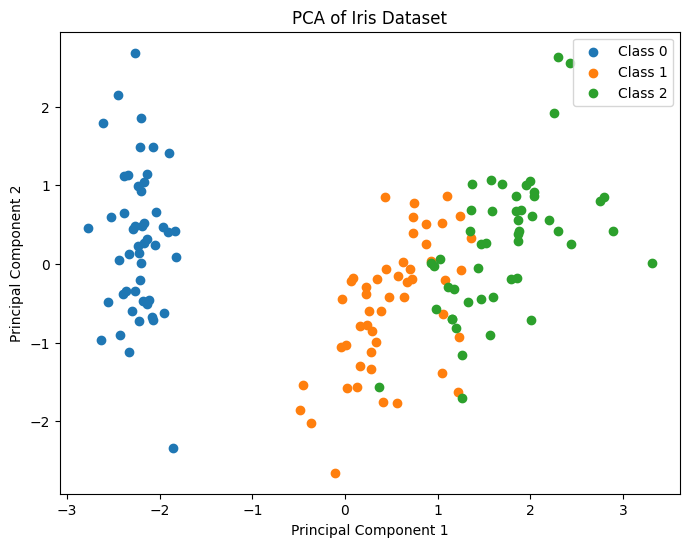

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
for target in set(y):
    indices = (y == target)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Class {int(target)}')

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### 23. t-Distributed Stochastic Neighbor Embedding (t-SNE) with the Iris Dataset

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique commonly used for visualizing high-dimensional data in a lower-dimensional space.

#### Introduction

t-SNE minimizes the divergence between two probability distributions: a distribution that measures pairwise similarities between the data points in the original space and a distribution that measures pairwise similarities in the reduced space.

#### Example Code

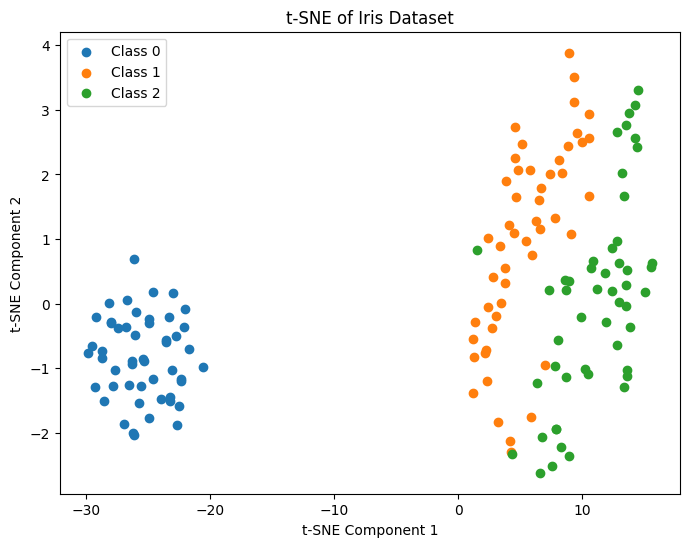

In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
for target in set(y):
    indices = (y == target)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=f'Class {int(target)}')

plt.title('t-SNE of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


### 24. K-Means Clustering with the Iris Dataset

K-Means Clustering is a partitioning method that divides a dataset into K distinct, non-overlapping subsets (clusters).

#### Introduction

Each data point belongs to the cluster with the nearest mean, and the center of the cluster is the mean of all the points in the cluster. It's an unsupervised learning algorithm commonly used for clustering.

#### Example Code

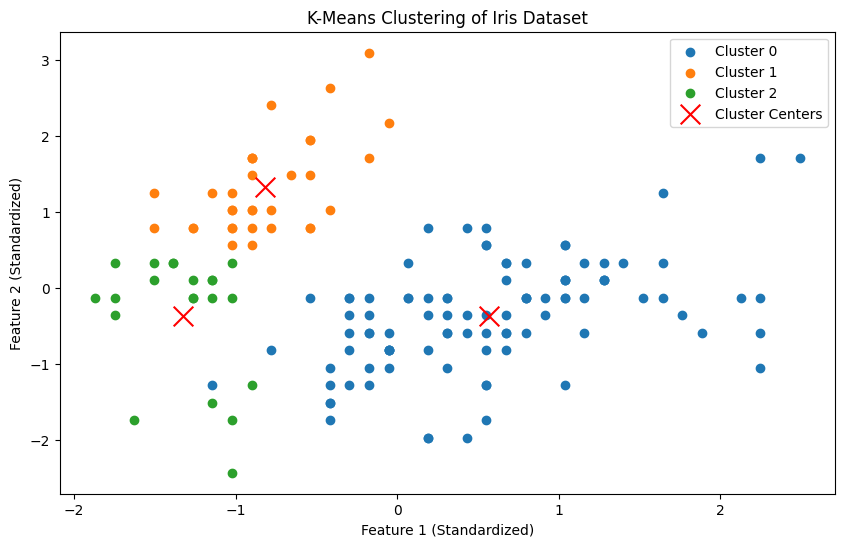

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables)
X = data.iloc[:, :-1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the results
plt.figure(figsize=(10, 6))

for cluster in set(data['cluster']):
    indices = (data['cluster'] == cluster)
    plt.scatter(X_scaled[indices, 0], X_scaled[indices, 1], label=f'Cluster {int(cluster)}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Cluster Centers')

plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()


### 25. Hierarchical Clustering with the Iris Dataset

Hierarchical Clustering is a clustering algorithm that builds a hierarchy of clusters by recursively merging or splitting clusters based on their similarity.

#### Introduction

There are two main types of hierarchical clustering: agglomerative (bottom-up) and divisive (top-down).

#### Example Code

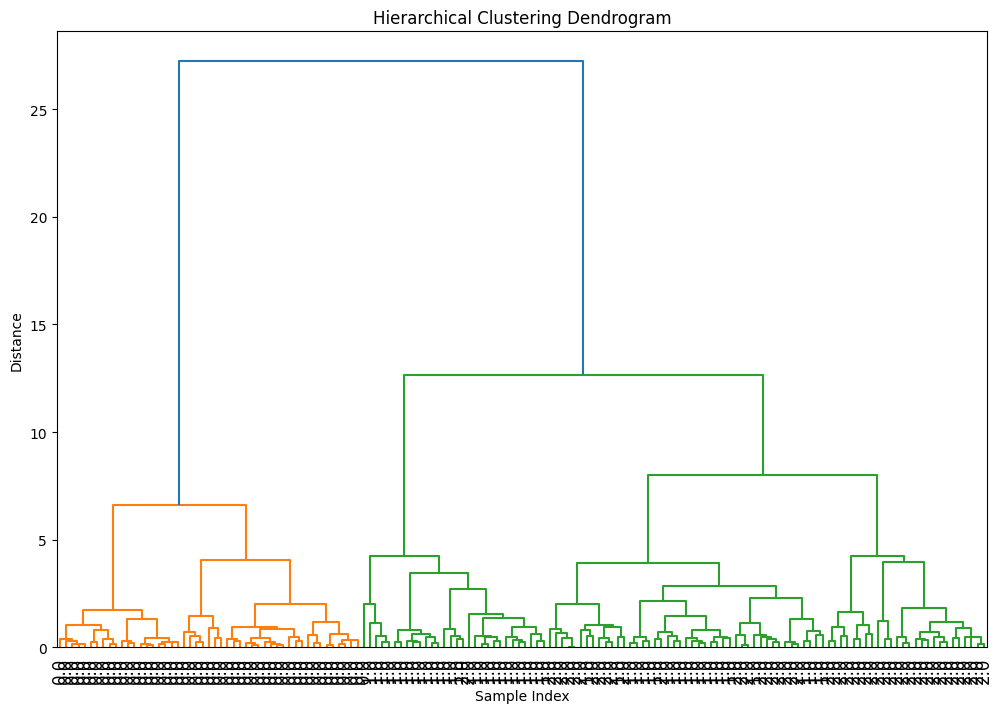

In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables)
X = data.iloc[:, :-1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data['target'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


### 26. Gaussian Mixture Models (GMM) with the Iris Dataset

Gaussian Mixture Models (GMM) is a probabilistic model that represents a mixture of Gaussian distributions.

#### Introduction

GMM is commonly used for clustering and density estimation. It assumes that the data is generated from a mixture of several Gaussian distributions, each with its own set of parameters.

#### Example Code

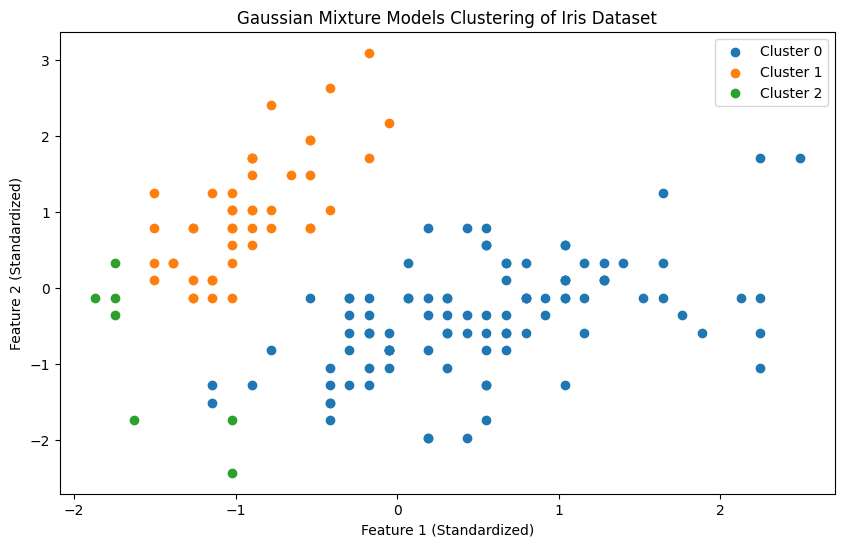

In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables)
X = data.iloc[:, :-1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, random_state=42)
data['cluster'] = gmm.fit_predict(X_scaled)

# Plot the results
plt.figure(figsize=(10, 6))

for cluster in set(data['cluster']):
    indices = (data['cluster'] == cluster)
    plt.scatter(X_scaled[indices, 0], X_scaled[indices, 1], label=f'Cluster {int(cluster)}')

plt.title('Gaussian Mixture Models Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()


### 27. Hidden Markov Models (HMM) with a Synthetic Dataset

Hidden Markov Models (HMM) represent a system with unobservable states, emitting observable symbols with certain probabilities.

#### Introduction

HMMs are widely used for modeling time series data, particularly in fields such as speech recognition, bioinformatics, and finance.

#### Example Code

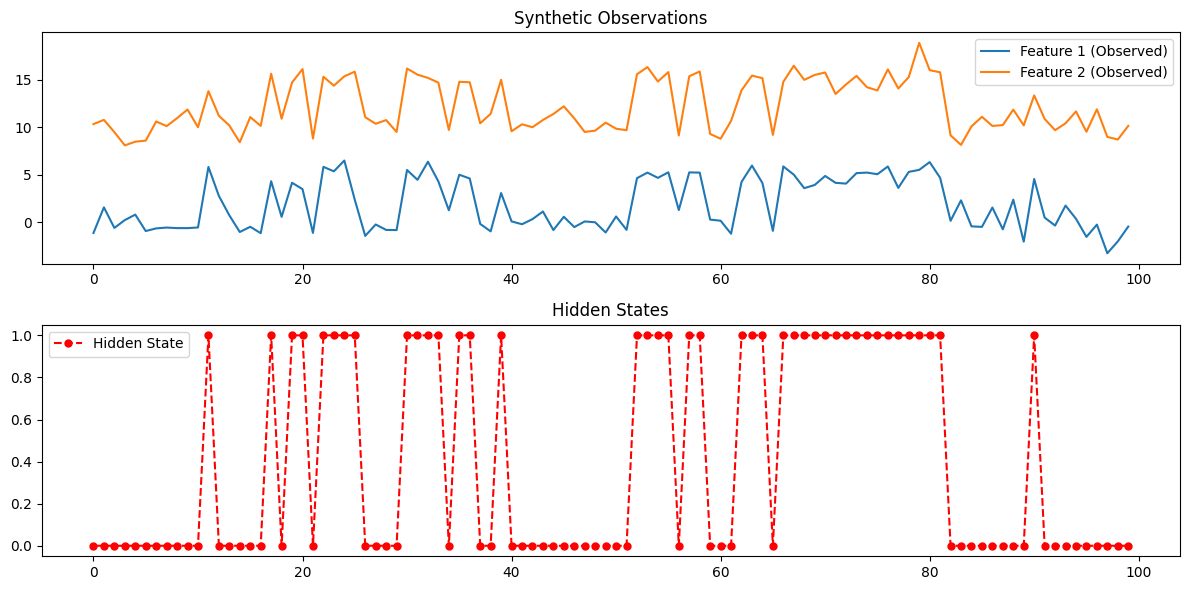

In [40]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Generate a synthetic dataset with two hidden states
np.random.seed(42)

# Transition matrix
trans_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])

# Emission probabilities
emission_means = np.array([[0.0, 10.0], [5.0, 15.0]])
emission_covars = np.tile(np.identity(2), (2, 1, 1))

# Create and fit an HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model.startprob_ = np.array([0.5, 0.5])
model.transmat_ = trans_matrix
model.means_ = emission_means
model.covars_ = emission_covars

# Generate synthetic samples
X, Z = model.sample(100)

# Plot the synthetic samples and the hidden states
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X[:, 0], label='Feature 1 (Observed)')
plt.plot(X[:, 1], label='Feature 2 (Observed)')
plt.title('Synthetic Observations')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(Z, label='Hidden State', color='red', linestyle='dashed', marker='o', markersize=5)
plt.title('Hidden States')
plt.legend()

plt.tight_layout()
plt.show()


### 28. Linear Discriminant Analysis (LDA) with the Iris Dataset

Linear Discriminant Analysis (LDA) is a classification and dimensionality reduction technique that seeks to find linear combinations of features that best separate different classes.

#### Introduction

LDA minimizes the within-class variance and maximizes the between-class variance.

#### Example Code


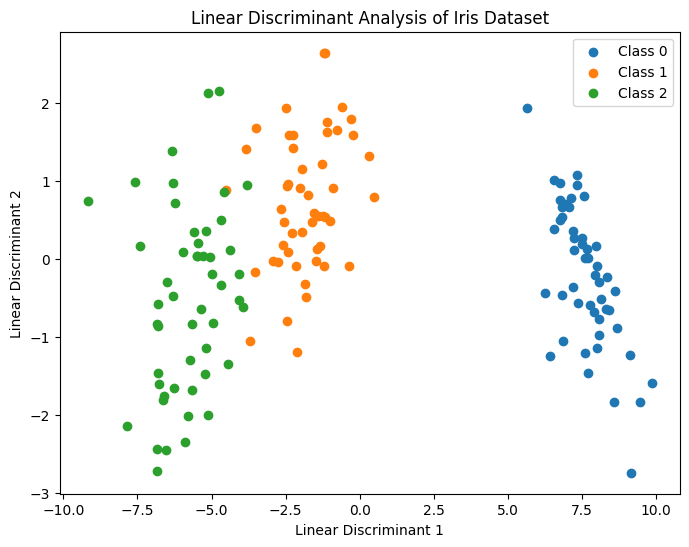

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot the results
plt.figure(figsize=(8, 6))

for target in set(y):
    indices = (y == target)
    plt.scatter(X_lda[indices, 0], X_lda[indices, 1], label=f'Class {int(target)}')

plt.title('Linear Discriminant Analysis of Iris Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend()
plt.show()


### 29. Quadratic Discriminant Analysis (QDA) with the Iris Dataset

Quadratic Discriminant Analysis (QDA) is a classification and dimensionality reduction technique that allows each class to have its own covariance matrix.

#### Introduction

QDA is similar to Linear Discriminant Analysis (LDA), but it does not assume equal covariance matrices for all classes.

#### Example Code

In [50]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create QDA classifier
qda = QuadraticDiscriminantAnalysis()

# Train the model
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


### 30. Ensemble Learning with Random Forest on the Iris Dataset

Ensemble learning combines the predictions of multiple base models to improve overall performance and generalization.

#### Introduction

Random Forest is an ensemble learning method based on bagging.

#### Example Code

In [51]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Select features (independent variables) and target (dependent variable)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

